In [1]:
from skimage import measure as m
from skimage.io import imread,imshow
import pandas as pd
import numpy as np
from skimage import feature,color,morphology
from skimage.exposure import histogram
from detect import Workspace
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm

In [48]:
w = Workspace('a','b',r'../Data/state2.PNG')

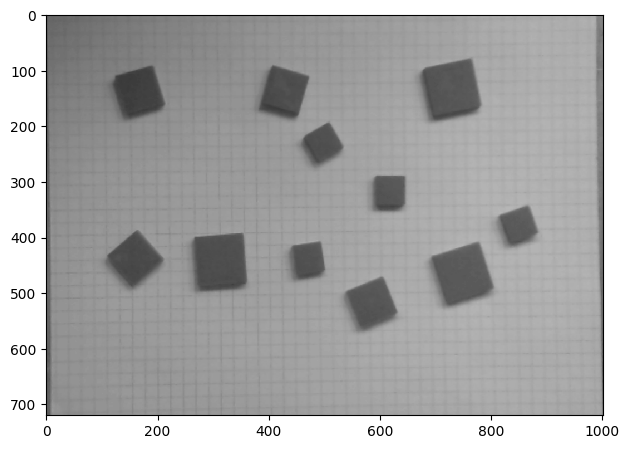

In [49]:
imshow(w.image)

In [50]:
w.detect_objects()
w.obj

,bbox-0,bbox-1,bbox-2,bbox-3,centroid-0,centroid-1,orientation,area
0,83,676,191,779,136.190392,726.799482,-0.008294,8493
1,93,118,189,213,141.275873,164.856323,0.133174,6445
2,93,383,187,471,141.047239,426.402570,-0.337226,5758
3,197,461,269,532,233.377201,495.579549,-0.833521,3237
4,291,590,353,644,320.862179,616.214423,-0.136085,3120
5,349,816,414,880,381.057203,847.879944,-0.284793,2832
6,390,111,491,209,440.555735,158.166397,-0.858441,5571
7,394,265,497,360,445.370895,311.864501,-0.029024,8679
8,411,442,476,500,442.511039,470.198377,-0.063089,3080
9,415,694,523,801,467.874613,747.625129,0.254826,7760


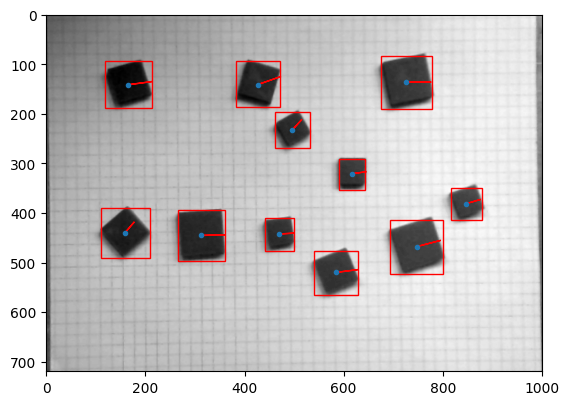

In [53]:
fig, ax = plt.subplots()
ax.imshow(w.image,cmap=cm.gray)
for x in w.obj.iterrows():
    theta = -abs(x[1]['orientation'])
    if x[1]['area'] < 4000:
        sc = 30
    elif 5500 > x[1]['area'] > 4000:
        sc = 45
    elif x[1]['area'] > 6000:
        sc = 50
    dx = np.cos(theta)*sc
    dy = np.sin(theta)*sc
    rect = patches.Arrow(x[1]['centroid-1'],x[1]['centroid-0'],dx,dy, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
    
for x in w.obj.iterrows():
    rect = patches.Rectangle((x[1]['bbox-1'], x[1]['bbox-2']), x[1]['bbox-3']-x[1]['bbox-1'], -(x[1]['bbox-2']-x[1]['bbox-0']), linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.plot(w.obj['centroid-1'],w.obj['centroid-0'],'.')

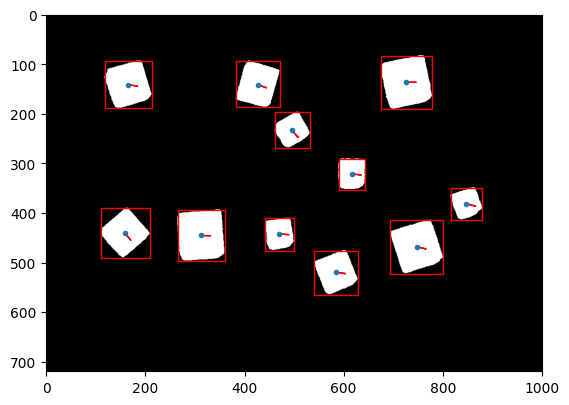

In [52]:
fig, ax = plt.subplots()
ax.imshow(w.imbw,cmap=cm.gray)
for x in w.obj.iterrows():
    theta = abs(x[1]['orientation'])
    sc = 20
    dx = np.cos(theta)*sc
    dy = np.sin(theta)*sc
    rect = patches.Arrow(x[1]['centroid-1'],x[1]['centroid-0'],dx,dy, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
    
for x in w.obj.iterrows():
    rect = patches.Rectangle((x[1]['bbox-1'], x[1]['bbox-2']), x[1]['bbox-3']-x[1]['bbox-1'], -(x[1]['bbox-2']-x[1]['bbox-0']), linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.plot(w.obj['centroid-1'],w.obj['centroid-0'],'.')